<a href="https://colab.research.google.com/github/ManasaAthota/MachineLearning/blob/master/Als_Testingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load** **and**  **Prepare**  **the** **data**

In [119]:
!pip install pandas==0.25
!pip install pandas-profiling 

In [120]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling as pf
import matplotlib as mat
from pandas_profiling import ProfileReport
%matplotlib inline
!pip install matplotlib-venn

In [121]:
df=pd.read_csv('/content/ALS_TestingData_78.csv')
df.head()
df.shape #given number of rows and columns

(78, 131)

In [122]:
df.describe()

ID  ...  White.Blood.Cell..WBC._range
count   78.000000  ...                     78.000000
mean    51.589744  ...                      0.012203
std     28.468910  ...                      0.014724
min      3.000000  ...                      0.003078
25%     27.250000  ...                      0.005658
50%     51.500000  ...                      0.008402
75%     74.750000  ...                      0.012471
max    100.000000  ...                      0.092045

[8 rows x 131 columns]

**Perform summary and preliminary visualization**

In [123]:
report=pf.ProfileReport(df)
report 

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [110]:
Deleted_columns=report.get_rejected_variables()
#Deleted_columns -To know the unused or rejected varibables
Deleted_columns

['Albumin_median',
 'ALSFRS_Total_min',
 'ALT.SGPT._min',
 'Calcium_range',
 'Creatinine_min',
 'Hemoglobin_median',
 'mouth_min',
 'Platelets_min',
 'Red.Blood.Cells..RBC._median',
 'Red.Blood.Cells..RBC._range',
 'SubjectID',
 'White.Blood.Cell..WBC._min']

In [111]:
#df.drop(Deleted_columns,axis=1) #droping the unused columns

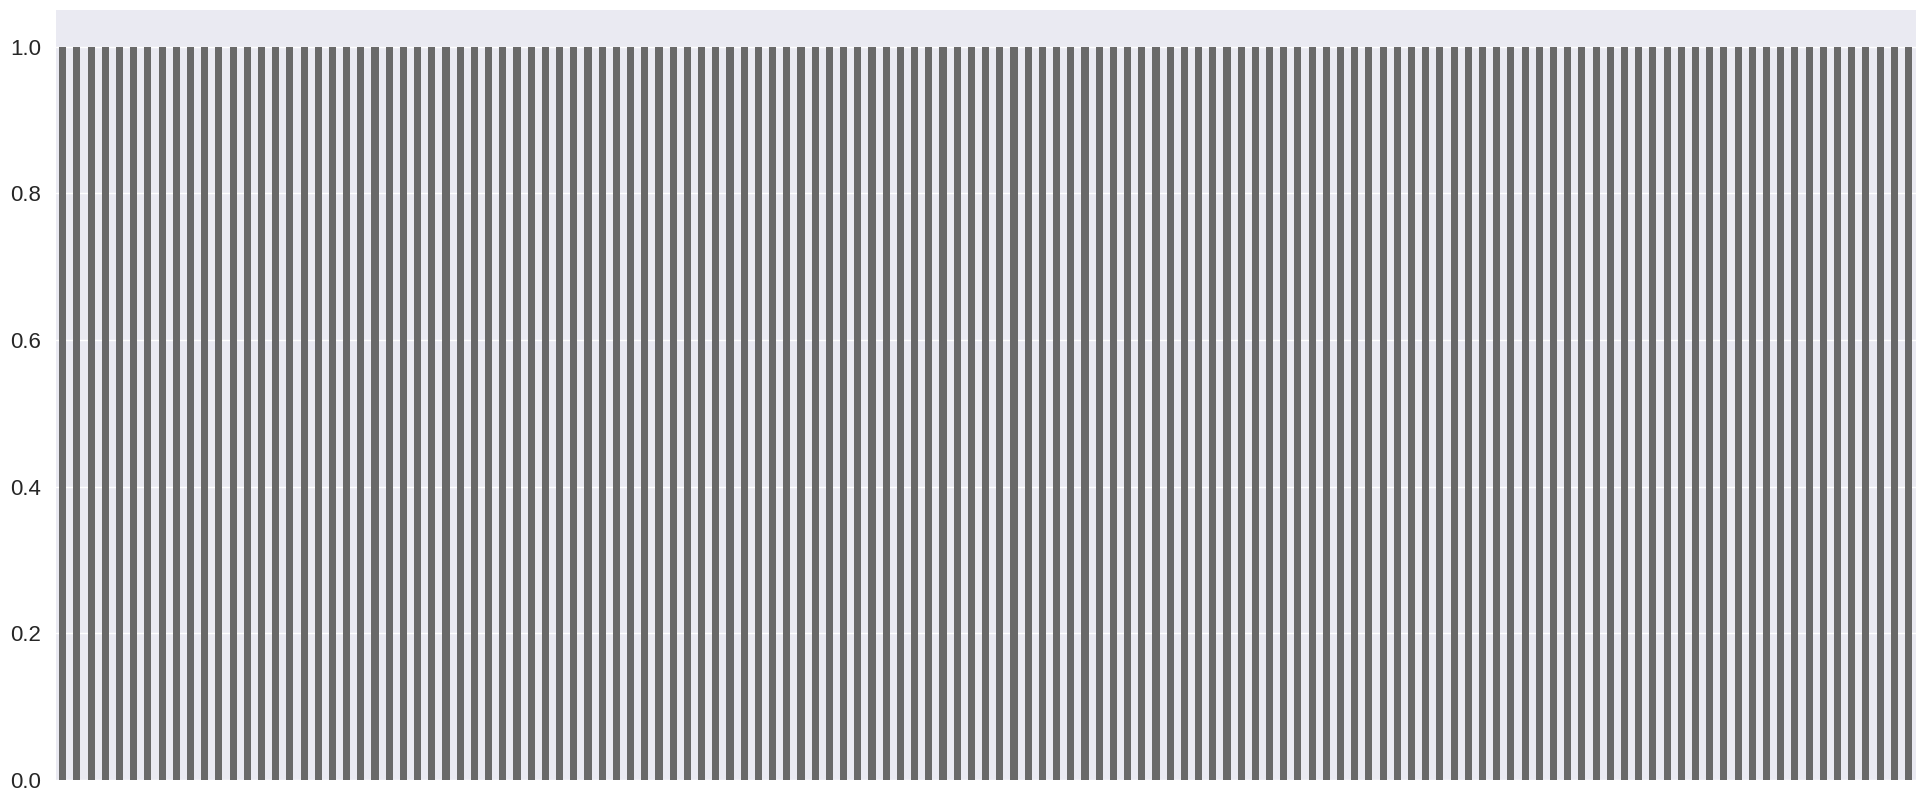

In [112]:
# To represent the missing values
msno.bar(df)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6146bb7b70>,
      dtype=object)

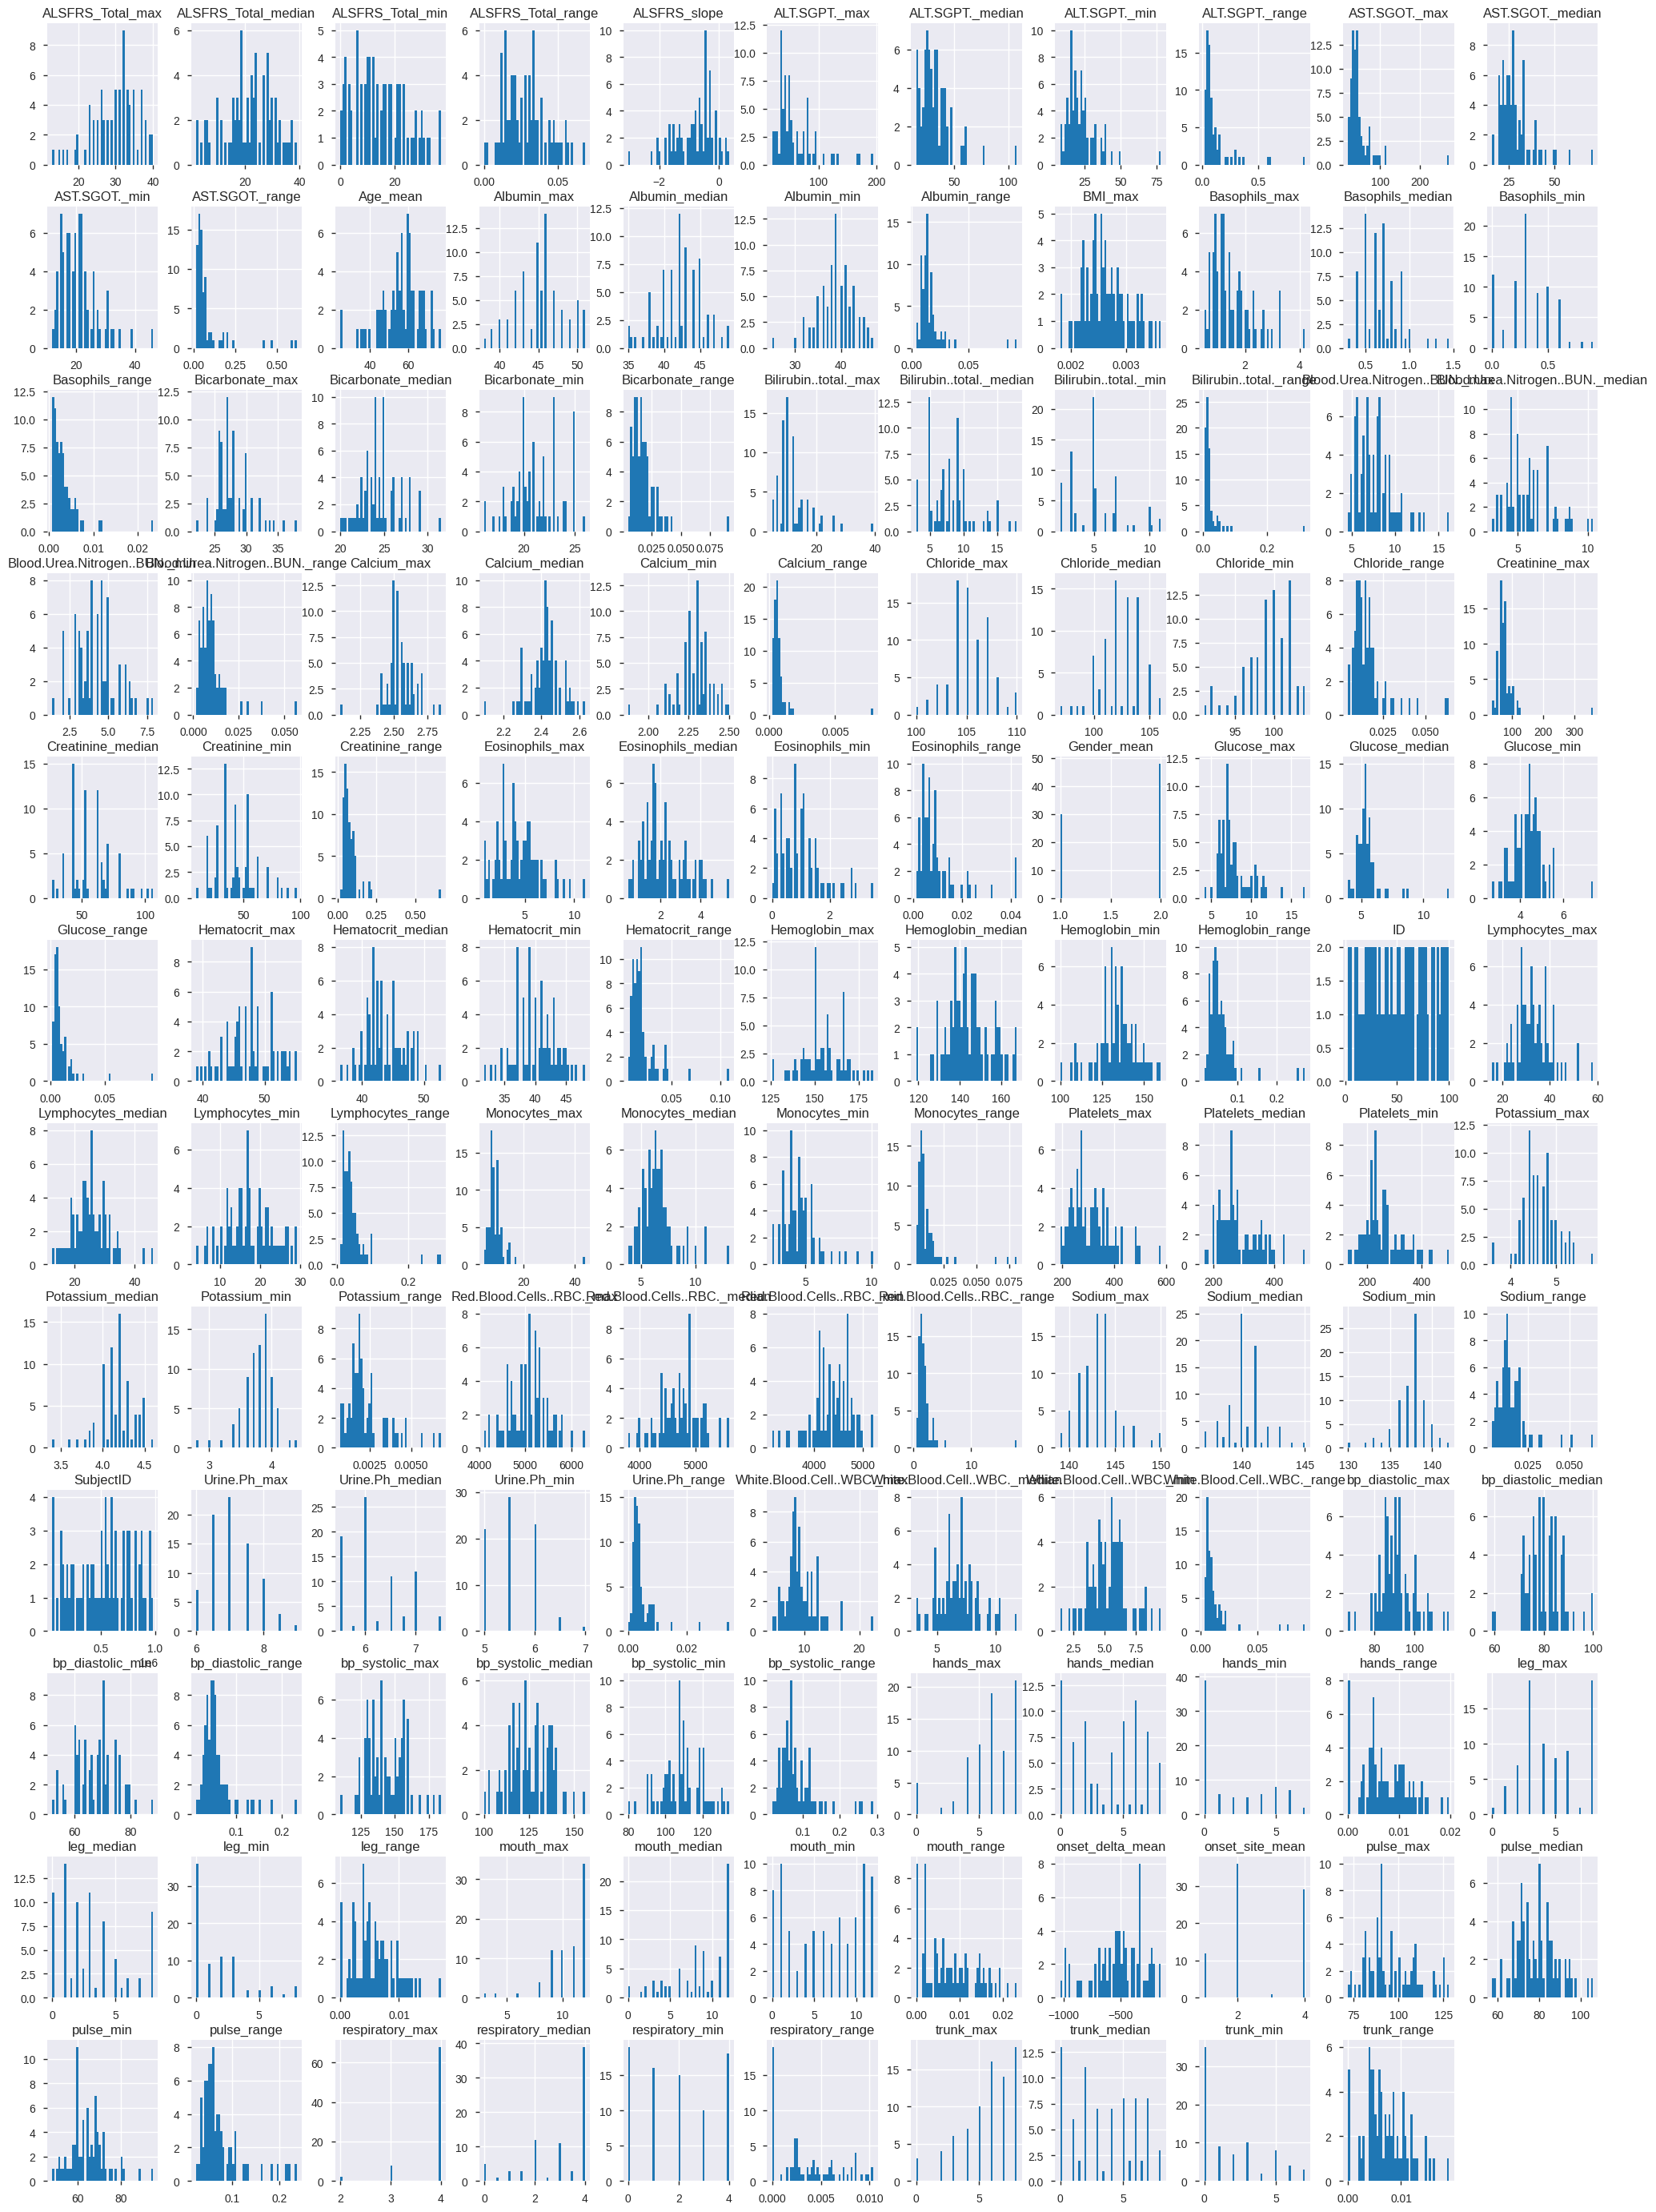

In [124]:
df.hist(figsize=(25,35),bins=50)

**The ALSFRS slope over time**-since its difficult to figure out the correlation between large amount  of data just considered the medians of the variables and checked the correlation.

In [114]:
df.corr()

ID  ...  White.Blood.Cell..WBC._range
ID                             1.000000  ...                     -0.001893
Age_mean                      -0.302863  ...                     -0.034097
Albumin_max                    0.070774  ...                      0.041103
Albumin_median                 0.150398  ...                     -0.046010
Albumin_min                    0.178115  ...                     -0.043323
...                                 ...  ...                           ...
Urine.Ph_range                -0.117956  ...                      0.544313
White.Blood.Cell..WBC._max     0.089575  ...                      0.333954
White.Blood.Cell..WBC._median  0.135866  ...                      0.231285
White.Blood.Cell..WBC._min     0.103637  ...                      0.087754
White.Blood.Cell..WBC._range  -0.001893  ...                      1.000000

[131 rows x 131 columns]

In [118]:
#considering the median varibales
filter_col = [col for col in df if col.endswith("median")]
med_corr=df[filter_col].corr().round(1)

**After observing the corelation values of the variables the variables whose value is  close to 1 is considered for predicting the change of the ALSFRS slope**

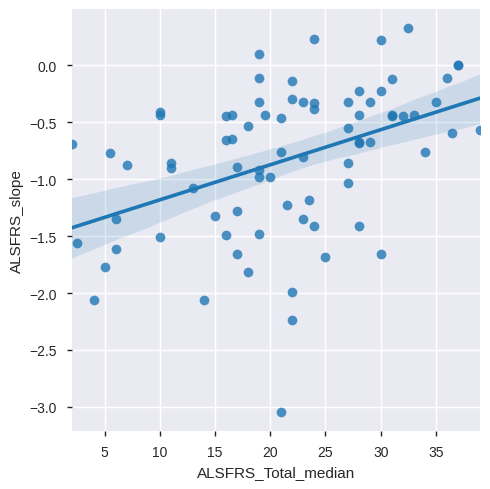

In [117]:
# graph to figure out the slope over time
sns.lmplot(x='ALSFRS_Total_median',y='ALSFRS_slope',data=df,fit_reg=True)

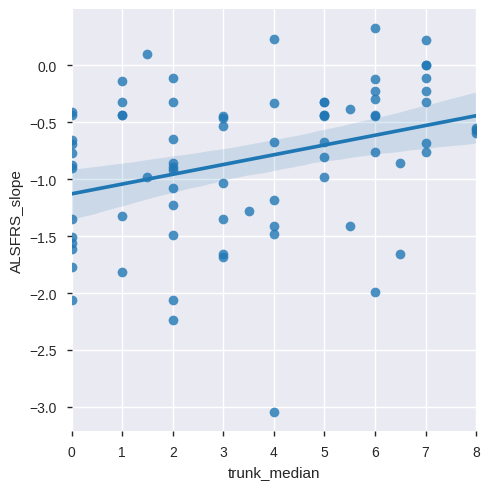

In [95]:
sns.lmplot(x='trunk_median',y='ALSFRS_slope',data=df,fit_reg=True)

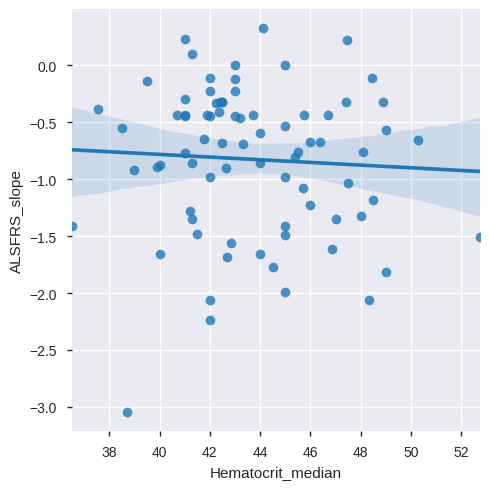

In [96]:
sns.lmplot(x='Hematocrit_median',y='ALSFRS_slope',data=df,fit_reg=True)

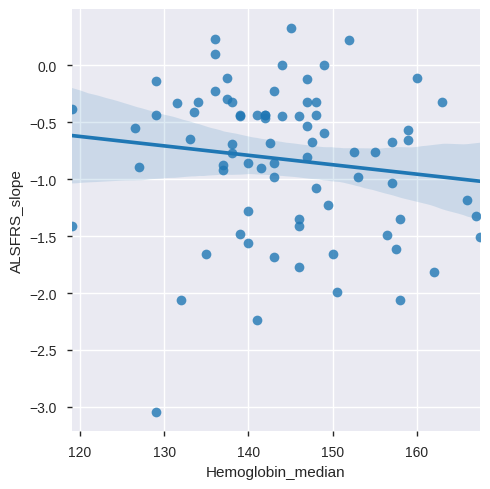

In [97]:
sns.lmplot(x='Hemoglobin_median',y='ALSFRS_slope',data=df,fit_reg=True)

**K-Mean Clustering**

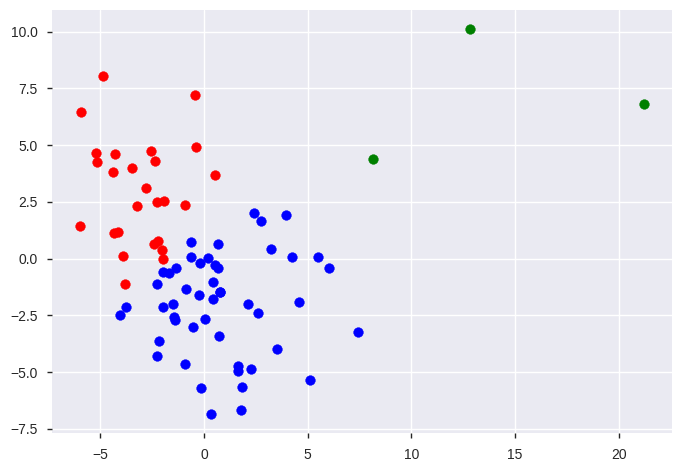

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x=df.values
x=StandardScaler().fit_transform(x)
pca_model=PCA(2)
components=pca_model.fit_transform(x)
df=pd.DataFrame(data=components,columns=['x','y'])
from sklearn.cluster import KMeans, SpectralClustering
km=KMeans(n_clusters=3,max_iter=100)
km.fit(df)
df['labels']=list(km.labels_)
cluster1=df[df['labels']==0]
plt.scatter(cluster1['x'],cluster1['y'],color='b')
cluster2=df[df['labels']==1]
plt.scatter(cluster2['x'],cluster2['y'],color='r')
cluster3=df[df['labels']==2]
plt.scatter(cluster3['x'],cluster3['y'],color='g')

In [75]:
#Calculating the centeriods 
Centriods=km.cluster_centers_
Centriods

array([[ 0.78119154, -2.02440143],
       [-3.09443257,  2.99680122],
       [14.05895374,  7.09294618]])

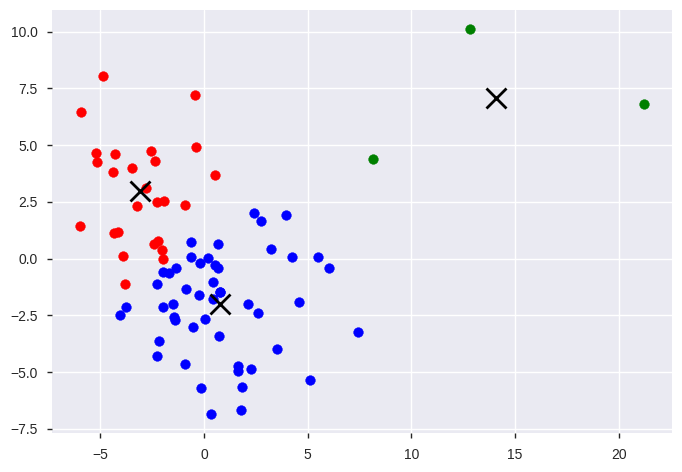

In [76]:
cluster1=df[df['labels']==0]
plt.scatter(cluster1['x'],cluster1['y'],color='b')
lines = plt.plot(Centriods[0,0],Centriods[0,1], 'kx', color= 'black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster2=df[df['labels']==1]
plt.scatter(cluster2['x'],cluster2['y'],color='r')
lines = plt.plot(Centriods[1,0],Centriods[1,1], 'kx', color= 'black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster3=df[df['labels']==2]
plt.scatter(cluster3['x'],cluster3['y'],color='g')
lines = plt.plot(Centriods[2,0],Centriods[2,1], 'kx', color= 'black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)
plt.show()

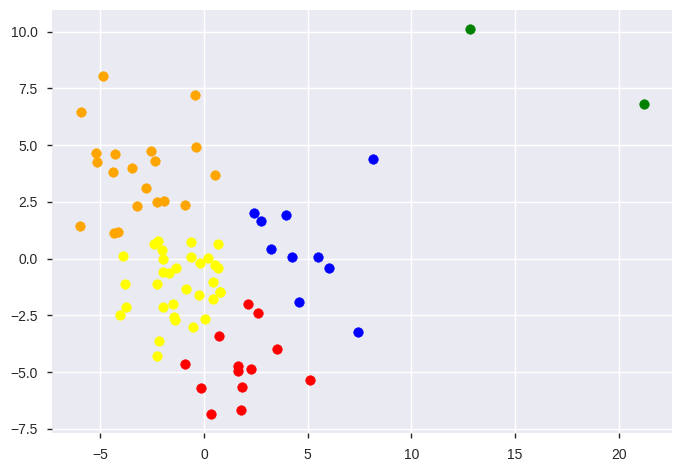

In [77]:
#K-Mean clusters with 5 as the number of the clusters
km=KMeans(n_clusters=5,max_iter=100)
km.fit(df)
df['labels']=list(km.labels_)
cluster1=df[df['labels']==0]
plt.scatter(cluster1['x'],cluster1['y'],color='b')
cluster2=df[df['labels']==1]
plt.scatter(cluster2['x'],cluster2['y'],color='r')
cluster3=df[df['labels']==2]
plt.scatter(cluster3['x'],cluster3['y'],color='g')
cluster4=df[df['labels']==3]
plt.scatter(cluster4['x'],cluster4['y'],color='orange')
cluster5=df[df['labels']==4]
plt.scatter(cluster5['x'],cluster5['y'],color='yellow')

In [78]:
#centriod for 5 clusters
Centriods=km.cluster_centers_
Centriods

array([[ 4.82523580e+00,  4.92352135e-01,  2.00000000e-01],
       [ 1.73197087e+00, -4.71258035e+00, -5.55111512e-17],
       [ 1.70098586e+01,  8.44779964e+00,  2.00000000e+00],
       [-3.20706744e+00,  3.85667637e+00,  1.00000000e+00],
       [-1.23170751e+00, -1.14209405e+00,  1.81818182e-01]])

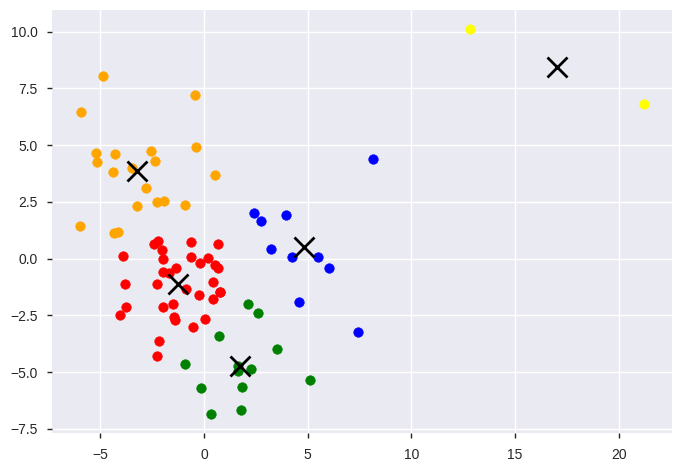

In [25]:
cluster1=df[df['labels']==0]
plt.scatter(cluster1['x'],cluster1['y'],color='b')
lines = plt.plot(Centriods[0,0],Centriods[0,1], 'kx', color= 'black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster2=df[df['labels']==1]
plt.scatter(cluster2['x'],cluster2['y'],color='r')
lines = plt.plot(Centriods[1,0],Centriods[1,1], 'kx', color= 'black')
plt.setp (lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster3=df[df['labels']==2]
plt.scatter(cluster3['x'],cluster3['y'],color='g')
lines = plt.plot(Centriods[2,0],Centriods[2,1], 'kx', color= 'black')
plt.setp (lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster4=df[df['labels']==3]
plt.scatter(cluster4['x'],cluster4['y'],color='orange')
lines = plt.plot(Centriods[3,0],Centriods[3,1], 'kx', color= 'black')
plt.setp (lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster5=df[df['labels']==4]
plt.scatter(cluster5['x'],cluster5['y'],color='yellow')
lines = plt.plot(Centriods[4,0],Centriods[4,1], 'kx', color= 'black')
plt.setp (lines, ms=15.0)
plt.setp(lines, mew=2.0)
plt.show ()

In [100]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

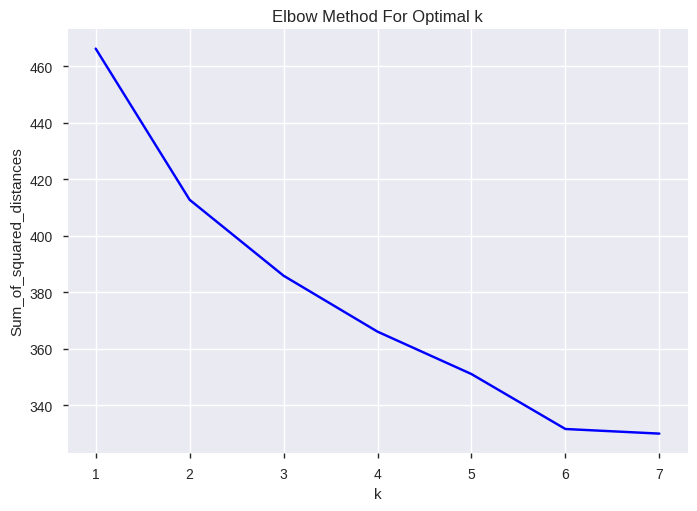

In [101]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()